# morph-var 4

## Classify the profiles of a new landform using the training data and the parameters determined in morph-var 3

In [3]:
import numpy as np
import pandas as pd
import os, re
import matplotlib.pyplot as plt
import scipy as sp
from scipy import interpolate as itp
from scipy.signal import argrelextrema
from scipy.spatial import distance
import scipy.fftpack
from mpl_toolkits.mplot3d import axes3d
import sklearn
from sklearn.model_selection import train_test_split
from geomdl import BSpline
from geomdl import utilities
# from geomdl.visualization import VisMPL
from geomdl import evaluators
from geomdl import operations
from geomdl import fitting
from natsort import natsorted, index_natsorted, order_by_index
from sklearn import preprocessing
from scipy.stats import mode
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import math
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm




from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.metrics import classification_report, confusion_matrix  
import itertools
from scipy import stats
from sklearn import svm, datasets

In [2]:
# pip install natsort -i https://pypi.tuna.tsinghua.edu.cn/simple

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Note: you may need to restart the kernel to use updated packages.


In [5]:
%matplotlib qt

## Define scarp profile morphologic classes

In [ ]:
# class1='VogarA_cropnorm_146.txt','VogarA_cropnorm_95.txt','VogarA_cropnorm_98.txt','VogarA_cropnorm_2.txt','Stora_Aragja_cropnorm_1.txt','Stora_Aragja_cropnorm_2.txt','Stora_Aragja_cropnorm_4.txt','Stora_Aragja_cropnorm_32.txt','Stora_Aragja_cropnorm_40.txt','Sodulholagja_cropnorm_18.txt','Sodulholagja_cropnorm_28.txt','RHPS_cropnorm_190.txt','RHPS_cropnorm_193.txt','RHPS_cropnorm_195.txt','RHPS_cropnorm_208.txt','RHPS_cropnorm_210.txt','VogarA_cropnorm_68.txt'
# class2='VogarA_cropnorm_129.txt','VogarA_cropnorm_131.txt','VogarA_cropnorm_133.txt','VogarA_cropnorm_134.txt','VogarA_cropnorm_135.txt','VogarA_cropnorm_137.txt','VogarA_cropnorm_138.txt','VogarA_cropnorm_139.txt','VogarA_cropnorm_140.txt','VogarA_cropnorm_38.txt','VogarA_cropnorm_50.txt','VogarA_cropnorm_47.txt','VogarA_cropnorm_46.txt','VogarA_cropnorm_57.txt','VogarA_cropnorm_56.txt','VogarA_cropnorm_55.txt','VogarA_cropnorm_53.txt','VogarA_cropnorm_51.txt','Stora_Aragja_cropnorm_34.txt','Stora_Aragja_cropnorm_35.txt','Stora_Aragja_cropnorm_54.txt','Stora_Aragja_cropnorm_55.txt'
# class3='LVBD-A_4_cropnorm_300.txt','LVBD-A_4_cropnorm_302.txt','LVBD-A_4_cropnorm_316.txt','LVBD-A_4_cropnorm_335.txt','LVBD-A_4_cropnorm_317.txt','LVBD-A_4_cropnorm_340.txt','LVBD-A_4_cropnorm_355.txt','LVBD-A_4_cropnorm_365.txt','LVBD-A_4_cropnorm_375.txt','LVBD-A_4_cropnorm_385.txt','LVBD-A_4_cropnorm_390.txt','LVBD-A_4_cropnorm_535.txt','LVBD-A_4_cropnorm_540.txt','LVBD-A_4_cropnorm_590.txt','LVBD-A_4_cropnorm_630.txt','LVBD-A_4_cropnorm_760.txt','LVBD-A_4_cropnorm_770.txt','VogarA_cropnorm_118.txt','VogarA_cropnorm_78.txt','Stora_Aragja_cropnorm_9.txt','Stora_Aragja_cropnorm_15.txt'
# class4='VogarA_cropnorm_30.txt','VogarA_cropnorm_33.txt','VogarA_cropnorm_35.txt','VogarA_cropnorm_41.txt','VogarA_cropnorm_61.txt','VogarA_cropnorm_63.txt','VogarA_cropnorm_64.txt','LVBD-A_1_cropnorm_136.txt','LVBD-A_1_cropnorm_145.txt','LVBD-A_1_cropnorm_147.txt','LVBD-A_1_cropnorm_155.txt','LVBD-A_1_cropnorm_275.txt','LVBD-A_1_cropnorm_276.txt','Stora_Aragja_cropnorm_41.txt','Stora_Aragja_cropnorm_60.txt','Sodulholagja_cropnorm_37.txt','Sodulholagja_cropnorm_38.txt','RHPS_cropnorm_140.txt','RHPS_cropnorm_430.txt'
# class5='LVBD-A_1_cropnorm_96.txt','LVBD-A_1_cropnorm_410.txt','LVBD-A_1_cropnorm_570.txt','LVBD-A_1_cropnorm_575.txt','LVBD-A_1_cropnorm_650.txt','LVBD-A_1_cropnorm_690.txt','LVBD-A_4_cropnorm_0.txt','LVBD-A_4_cropnorm_5.txt','LVBD-A_4_cropnorm_7.txt','LVBD-A_4_cropnorm_11.txt','LVBD-A_4_cropnorm_210.txt','LVBD-A_4_cropnorm_225.txt','LVBD-A_4_cropnorm_515.txt','Stora_Aragja_cropnorm_6.txt','Stora_Aragja_cropnorm_67.txt','RHPS_cropnorm_20.txt','RHPS_cropnorm_60.txt','RHPS_cropnorm_65.txt'
# class6='VogarA_cropnorm_26.txt','VogarA_cropnorm_28.txt','LVBD-A_1_cropnorm_100.txt','LVBD-A_1_cropnorm_101.txt','LVBD-A_1_cropnorm_102.txt','LVBD-A_1_cropnorm_104.txt','LVBD-A_1_cropnorm_106.txt','LVBD-A_1_cropnorm_114.txt','LVBD-A_1_cropnorm_117.txt','LVBD-A_1_cropnorm_130.txt','LVBD-A_1_cropnorm_164.txt','LVBD-A_1_cropnorm_166.txt','LVBD-A_1_cropnorm_167.txt','LVBD-A_1_cropnorm_450.txt','LVBD-A_1_cropnorm_800.txt','LVBD-A_1_cropnorm_854.txt','LVBD-A_4_cropnorm_150.txt','LVBD-A_4_cropnorm_155.txt','LVBD-A_4_cropnorm_151.txt','Stora_Aragja_cropnorm_44.txt','Stora_Aragja_cropnorm_51.txt','Stora_Aragja_cropnorm_58.txt','Stora_Aragja_cropnorm_59.txt','Stora_Aragja_cropnorm_64.txt','Stora_Aragja_cropnorm_68.txt','Sodulholagja_cropnorm_26.txt','RHPS_cropnorm_397.txt','RHPS_cropnorm_500.txt'


## Load normalized scarp profile data


In [4]:
def load_data_class(class_name,path):
    #Set path to folder with training data
    data_x_temp = []
    data_y_temp = []
    filenames =class_name
    for file in filenames:
            # Load x-coordinate data from files matching regular expression for desired class
            data_x_temp.append(pd.read_csv(path+"/"+file).iloc[:,1].values)
            # Load y-coordinate data from files matching regular expression for desired class
            data_y_temp.append(pd.read_csv(path+"/"+file).iloc[:,2].values)
            
    # Create 4 dataframes for x,y,maxima and minima
    dataclass_x = pd.DataFrame(data_x_temp).transpose() 
    dataclass_y = pd.DataFrame(data_y_temp).transpose()
    dataclass_x.columns = filenames
    dataclass_y.columns = filenames
    
    return dataclass_x, dataclass_y

In [5]:
def load_data_scarp(scarp_name,path):
    #Set path to folder with training data
    data_x_temp = []
    data_y_temp = []
    # filenames = [filename for filename in os.listdir(path) if re.match(scarp_name,filename)]
    for file in filenames:
            # Load x-coordinate data from files matching regular expression for desired class
            file = file.replace('crop', '')
            data_x_temp.append(pd.read_csv(path+"/"+file).iloc[:,1].values)
            # Load y-coordinate data from files matching regular expression for desired class
            data_y_temp.append(pd.read_csv(path+"/"+file).iloc[:,2].values)
            
    # Create 4 dataframes for x,y,maxima and minima
    dataclass_x = pd.DataFrame(data_x_temp).transpose() 
    dataclass_y = pd.DataFrame(data_y_temp).transpose()
    dataclass_x.columns = filenames
    dataclass_y.columns = filenames
    
    return dataclass_x, dataclass_y

In [6]:
# path1= "2D_cropped_normalized/"
# path2= 'All_cropped_normalized/'
#Set path to that of the output files from process-profiles
# path= "./All_2D_cropped_normalized"
path1='./result/profile_shapefile/DE001_cropped_normalized_profiles'  
path2= './All_2D_normalized/'
path = path1

In [7]:
import os  
import random 
folder_path = './result/profile_shapefile/DE001_cropped_normalized_profiles'  
def is_file_empty(filepath):  
    """检查文件是否为空（基于内容）"""  
    try:  
        with open(filepath, 'r', encoding='utf-8') as file:  
            # 读取并跳过第一行  
            for _ in range(5):  
                file.readline()  
            # 读取第二行并去除首尾空格  
            second_line = file.readline().strip()  
            # 检查第二行是否仅包含逗号和可选的空格  
            return second_line.replace(' ', '').replace(',', '').replace('', '') == ''  
    except Exception as e:  
        print(f"Error reading file {filepath}: {e}")  
        return True  # 出错时也可以视为文件为空（或根据具体需求处理）  
  
# 使用函数检查文件  
# 获取文件夹中所有文件的列表  
filenames = [f for f in os.listdir(folder_path) if f.endswith('.txt')] 
non_empty_filenames = [f for f in filenames if not is_file_empty(os.path.join(folder_path, f))]  
  
 
  
# 随机打乱文件名列表，以确保分配的随机性（如果需要可重复的结果，可以取消注释random.seed那行）  
# random.seed(1)  # 取消注释以使用固定的随机种子  
random.shuffle(non_empty_filenames)  
  
# 定义类别数量和每个类别应尽可能包含的文件数  
num_classes = 6  
# files_per_class = len(filenames) // num_classes  
# remainder = len(filenames) % num_classes  
# 现在使用非空文件名列表进行后续操作  
files_per_class = len(non_empty_filenames) // num_classes  
remainder = len(non_empty_filenames) % num_classes  
    
# 初始化一个空列表来存储所有类别的文件名元组  
classes_tuples = []  
  
# 分配文件名到各个类别  
index = 0  
for i in range(num_classes):  
    # 每个类别先分配固定的文件数  
    class_files = filenames[index:index + files_per_class]  
    index += files_per_class  
      
    # 如果当前类别是最后一个类别且有剩余文件，则将剩余文件全部添加到该类别  
    if i == num_classes - 1 and remainder > 0:  
        class_files.extend(filenames[index:index + remainder])  
      
    # 将列表转换为元组并添加到类别列表中  
    classes_tuples.append(tuple(class_files))  
  
# 分配剩余文件（如果有）到前面的类别中（这里我们选择均匀分配的策略）  
# 但由于我们的处理方式（先分配固定数量），这一步实际上可能不需要（因为剩余文件已经加到了最后一个类别）  
# 如果想要更复杂的分配策略（比如每个类别都尽量接近平均数），则需要更复杂的逻辑  
  
# 为了符合题目要求，我们可以用变量名来引用这些元组  
class1, class2, class3, class4, class5, class6 = classes_tuples  
  

# Load profile data for each class
(data1_x, data1_y) = load_data_class(class1,path)
(data2_x, data2_y) = load_data_class(class2,path)
(data3_x, data3_y) = load_data_class(class3,path)
(data4_x, data4_y) = load_data_class(class4,path)
(data5_x, data5_y) = load_data_class(class5,path)
(data6_x, data6_y) = load_data_class(class6,path)

#Define 2 matrices with the positional data of profiles
M = pd.concat([data1_x, data2_x, data3_x,data4_x, data5_x, data6_x],axis=1)
Z = pd.concat([data1_y, data2_y, data3_y,data4_y, data5_y,data6_y],axis=1)
names=list(M.columns)

empty_names=[]
new_filenames = []
for a in names:
    if len(M[a].dropna())<=3:
        empty_names.append(a)
        # print (f"Appending {a}")
    else:
        new_filenames.append(a)
        continue 
        
files_per_class = len(new_filenames) // num_classes  
remainder = len(new_filenames) % num_classes  
    
# 初始化一个空列表来存储所有类别的文件名元组  
classes_tuples = []  
index = 0  
for i in range(num_classes):  
    # 每个类别先分配固定的文件数  
    class_files = new_filenames[index:index + files_per_class]  
    index += files_per_class  
      
    # 如果当前类别是最后一个类别且有剩余文件，则将剩余文件全部添加到该类别  
    if i == num_classes - 1 and remainder > 0:  
        class_files.extend(new_filenames[index:index + remainder])  
      
    # 将列表转换为元组并添加到类别列表中  
    classes_tuples.append(tuple(class_files))  
  
# 分配剩余文件（如果有）到前面的类别中（这里我们选择均匀分配的策略）  
# 但由于我们的处理方式（先分配固定数量），这一步实际上可能不需要（因为剩余文件已经加到了最后一个类别）  
# 如果想要更复杂的分配策略（比如每个类别都尽量接近平均数），则需要更复杂的逻辑  
  
# 为了符合题目要求，我们可以用变量名来引用这些元组  
class1, class2, class3, class4, class5, class6 = classes_tuples  
  
  

In [8]:
file_name = ".*.txt"

In [9]:
(data1_x, data1_y) = load_data_class(class1,path1)
(data2_x, data2_y) = load_data_class(class2,path1)
(data3_x, data3_y) = load_data_class(class3,path1)
(data4_x, data4_y) = load_data_class(class4,path1)
(data5_x, data5_y) = load_data_class(class5,path1)
(data6_x, data6_y) = load_data_class(class6,path1)

In [10]:
(data7_x, data7_y) = load_data_scarp(new_filenames,path2)
names1=data7_x.columns[data7_x.iloc[4,:].isnull()==False]
names1=natsorted(names1)
names2=data7_x.columns[data7_x.iloc[4,:].isnull()==True]
names2=natsorted(names2)
just_names=[os.path.splitext(names1[a])[0]+"_2.txt" for a in range(0,len(names1))]
data7_x=data7_x[names1]
data7_x.columns=just_names
data7_y=data7_y[names1]
data7_y.columns=just_names

In [11]:
len1 = len(data1_x.columns)
len2 = len(data2_x.columns)
len3 = len(data3_x.columns)
len4 = len(data4_x.columns)
len5 = len(data5_x.columns)
len6 = len(data6_x.columns)
len7 = len(data7_x.columns)

total_len = len1+len2+len3+len4+len5+len6+len7

In [12]:
file_name

'.*.txt'

In [13]:
M = pd.concat([data1_x, data2_x, data3_x, data4_x, data5_x, data6_x, data7_x],axis=1)
Z = pd.concat([data1_y, data2_y, data3_y, data4_y, data5_y, data6_y, data7_y],axis=1)

In [14]:
names=M.columns

In [15]:
len(names)

355

## Fit curve to profile data


In [16]:
#Set evaluation interval (=total number of observations in {x,y,k})
evaluate = pd.Series(np.linspace(0,1,300))

#Set the spacing at which M is evaluated
spacing = int(len(M))

x=[]
y=[]

for a in names:
    # M and Z are the control points, convert to list of coordinate tuples L
    if len(M[a].dropna())/spacing>5:
        M_temp = M[a].dropna()[0::spacing]
        Z_temp = Z[a].dropna()[0::spacing]
    else:
        M_temp= M[a].dropna()
        Z_temp=Z[a].dropna()
    L = list(zip(M_temp,Z_temp)) # zip M_temp and Z_temp to create list of tuples of points
    # Create B-Spline curve
    curve = BSpline.Curve() # define the BSpline curve
    curve.degree =3# define the degree of the curve
    curve.ctrlpts = L # set control points as list of tuples L
    curve.knotvector = utilities.generate_knot_vector(curve.degree, len(curve.ctrlpts)) # auto-generate knot vector
    curve.evaluate() # evaluate curve
    # Calculate x,y coordinates and derivatives of curve at u values
    x_temp = []
    y_temp = []
    for i in evaluate.iloc[:-1]:
        ders = curve.derivatives(i, order = 2) # calculate 1st and 2nd derivatives of the curve at u, returns 3 tuples defined below.
        x_temp2 = ders[0][0] # x-position at u
        y_temp2 = ders[0][1] # y-position at u
        x_temp.append(x_temp2)
        y_temp.append(y_temp2)
    x.append(x_temp)
    y.append(y_temp)
x=pd.DataFrame(x).transpose()
x.columns=names
y=pd.DataFrame(y).transpose()
y.columns=names

In [17]:
x.to_csv("x_all.txt")
y.to_csv("y_all.txt")

In [18]:
M[a]

0      2.951078
1      5.902156
2      8.853234
3     11.804312
4     14.755390
5     17.706468
6     20.657546
7     23.608624
8     26.559702
9     29.510780
10    32.461858
11    32.461858
12          NaN
13          NaN
Name: DE001_cropnorm_264_2.txt, dtype: float64

In [19]:
a

'DE001_cropnorm_264_2.txt'

## Dimension reduction

In [20]:
xy=[]
for a in names:
    xy_temp=pd.concat([x[a],y[a]],axis=1).values
    xy_temp2=xy_temp.flatten()
    xy.append(xy_temp2)
xy=pd.DataFrame(xy).transpose()
xy.columns=names

In [21]:
features=xy
n_features, n_samples = features.shape
mean = pd.Series(np.mean(features, axis=1))
features=np.zeros([n_features,n_samples])
for a in range(0,n_samples):
    centered_data_temp=xy.iloc[:,a]-mean
    features[:,a]=centered_data_temp
scaler = StandardScaler()
features = scaler.fit_transform(features)

U, S, V = scipy.linalg.svd(features,full_matrices=False)

In [23]:
# optimal_number_modes

## Classification


In [24]:
optimal_number_modes=5

In [25]:
proj=V.T*S
proj=pd.DataFrame(proj)


In [26]:
one = np.ones((len1,))
two = np.ones((len2,))*2
three = np.ones((len3,))*3
four = np.ones((len4,))*4
five = np.ones((len5,))*5
six = np.ones((len6,))*6

classes= np.concatenate((one,two,three,four,five,six), axis=0)

In [27]:
X_train=proj.iloc[:len1+len2+len3+len4+len5+len6,:optimal_number_modes]
y_train=classes
X_test=proj.iloc[len1+len2+len3+len4+len5+len6:,:optimal_number_modes]


In [28]:
classifier = svm.SVC(kernel='rbf', C=5, decision_function_shape='ovo').fit(X_train, y_train)

In [29]:
y_pred=classifier.predict(X_test)

In [30]:
names_predict = names[len1+len2+len3+len4+len5+len6:]
predictions = pd.DataFrame([names_predict,y_pred]).transpose()
predictions.columns = ['filename','class']
predictions = predictions.reindex(index=order_by_index(predictions.index, index_natsorted(predictions['filename']))).reset_index(drop=True)

In [31]:
predictions

,filename,class
0,DE001_cropnorm_0_2.txt,4.0
1,DE001_cropnorm_1_2.txt,4.0
2,DE001_cropnorm_2_2.txt,4.0
3,DE001_cropnorm_3_2.txt,6.0
4,DE001_cropnorm_4_2.txt,6.0
...,...,...
260,DE001_cropnorm_260_2.txt,6.0
261,DE001_cropnorm_261_2.txt,6.0
262,DE001_cropnorm_262_2.txt,4.0
263,DE001_cropnorm_263_2.txt,4.0


#### Visualize classification results

In [32]:
# Define function to read x,y,z data from text files into three separate dataframes (dataclass_x,dataclass_y,dataclass_z) for each class. Rows of the dataframes indicate the number of points in a profile, columns indicate the index of the profiles.  
def load_data_3(data,path):
    #Set path to folder with training data
    data_x_temp = []
    data_y_temp = []
    data_z_temp = []
    # filenames = [filename for filename in os.listdir(path) if re.match(data, filename)]
    for file in new_filenames:
            file = file.replace('crop', '')
            print(pd.read_csv(path+"/"+file).iloc[:,0].values)
            data_x_temp.append(pd.read_csv(path+"/"+file).iloc[:,1].values)
            # data_x_temp.append(pd.read_csv(path+"/"+file).iloc[:,1].values)
            # Load x-coordinate data from files matching regular expression for desired class
            data_x_temp.append(pd.read_csv(path+"/"+file).iloc[:,1].values)
            # Load y-coordinate data from files matching regular expression for desired class
            data_y_temp.append(pd.read_csv(path+"/"+file).iloc[:,2].values)
            # Load z-coordinate data from files matching regular expression for desired class
            data_z_temp.append(pd.read_csv(path+"/"+file).iloc[:,3].values) 
    # Create 3 dataframes for x,y, and z-coordinate data
    dataclass_x = pd.DataFrame(data_x_temp).transpose() 
    dataclass_y = pd.DataFrame(data_y_temp).transpose()
    dataclass_z = pd.DataFrame(data_z_temp).transpose()
    dataclass_x.columns = new_filenames
    dataclass_y.columns = new_filenames
    dataclass_z.columns = new_filenames
    return dataclass_x, dataclass_y, dataclass_z

In [34]:
# # path2= './All_2D_normalized'
# data3D = scarp_name+".*.txt"
# path3='/Users/cassandrabrigham/Documents/RESEARCH/2021/Code/Profile extraction/Extracted_profiles/OtherHI/'

In [37]:
# (data3D_x,data3D_y,data3D_z) = load_data_3(new_filenames,path2)

In [38]:
# names3d = pd.DataFrame(data3D_x.columns)
# names3d.columns = ['filenames']
# names3d = names3d.sort_values(by='filenames').reset_index(drop=True)

In [ ]:
predictions3d = pd.concat([names3d,predictions['class']],axis=1)

In [ ]:
pred_class1 = list(predictions3d['filenames'][predictions3d.index[predictions3d['class']==1]].dropna())
pred_class2 = list(predictions3d['filenames'][predictions3d.index[predictions3d['class']==2]].dropna())
pred_class3 = list(predictions3d['filenames'][predictions3d.index[predictions3d['class']==3]].dropna())
pred_class4 = list(predictions3d['filenames'][predictions3d.index[predictions3d['class']==4]].dropna())
pred_class5 = list(predictions3d['filenames'][predictions3d.index[predictions3d['class']==5]].dropna())
pred_class6 = list(predictions3d['filenames'][predictions3d.index[predictions3d['class']==6]].dropna())

In [ ]:
def set_axes_equal(ax):
    '''Make axes of 3D plot have equal scale so that spheres appear as spheres,
    cubes as cubes, etc..  This is one possible solution to Matplotlib's
    ax.set_aspect('equal') and ax.axis('equal') not working for 3D.

    Input
      ax: a matplotlib axis, e.g., as output from plt.gca().
    '''

    x_limits = ax.get_xlim3d()
    y_limits = ax.get_ylim3d()
    z_limits = ax.get_zlim3d()

    x_range = abs(x_limits[1] - x_limits[0])
    x_middle = np.mean(x_limits)
    y_range = abs(y_limits[1] - y_limits[0])
    y_middle = np.mean(y_limits)
    z_range = abs(z_limits[1] - z_limits[0])
    z_middle = np.mean(z_limits)

    # The plot bounding box is a sphere in the sense of the infinity
    # norm, hence I call half the max range the plot radius.
    plot_radius = 0.5*max([x_range, y_range, z_range])

    ax.set_xlim3d([x_middle - plot_radius, x_middle + plot_radius])
    ax.set_ylim3d([y_middle - plot_radius, y_middle + plot_radius])
    ax.set_zlim3d([z_middle - plot_radius, z_middle + plot_radius])

fig = plt.figure(figsize=plt.figaspect(1)*1.5)
ax = fig.add_subplot(111, projection='3d')
for a in pred_class1:
    ax.plot(data3D_x[a],data3D_y[a],data3D_z[a],color='firebrick')
for b in pred_class2:
    ax.plot(data3D_x[b],data3D_y[b],data3D_z[b],color='darkorange')
for c in pred_class3:
    ax.plot(data3D_x[c],data3D_y[c],data3D_z[c],color='darkmagenta')
for d in pred_class4:
    ax.plot(data3D_x[d],data3D_y[d],data3D_z[d],color='orchid')
for e in pred_class5:
    ax.plot(data3D_x[e],data3D_y[e],data3D_z[e],color='darkcyan')
for e in pred_class6:
    ax.plot(data3D_x[e],data3D_y[e],data3D_z[e],color='mediumslateblue')
set_axes_equal(ax)
ax.elev=9000
ax.azim=0

plt.show()

In [39]:
pred_2D_class1=list(predictions['filename'][predictions.index[predictions['class']==1]].dropna())
pred_2D_class2=list(predictions['filename'][predictions.index[predictions['class']==2]].dropna())
pred_2D_class3=list(predictions['filename'][predictions.index[predictions['class']==3]].dropna())
pred_2D_class4=list(predictions['filename'][predictions.index[predictions['class']==4]].dropna())
pred_2D_class5=list(predictions['filename'][predictions.index[predictions['class']==5]].dropna())
pred_2D_class6=list(predictions['filename'][predictions.index[predictions['class']==6]].dropna())

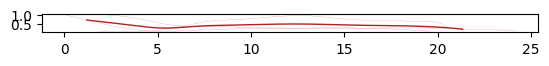

In [40]:
fig,ax=plt.subplots()
ax.plot(x[pred_2D_class1],y[pred_2D_class1],color='firebrick',linewidth=0.1)
ax.plot(x[pred_2D_class1].mean(axis=1),y[pred_2D_class1].mean(axis=1),color='firebrick',linewidth=1)
ax.set_aspect('equal')

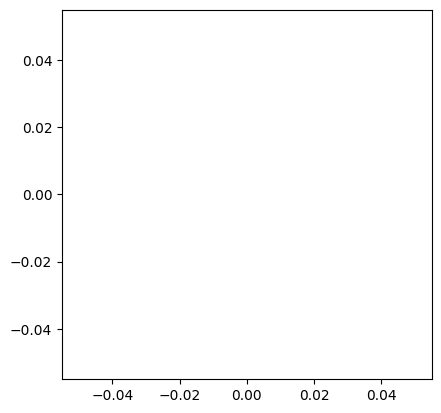

In [41]:
fig,ax=plt.subplots()
ax.plot(x[pred_2D_class2],y[pred_2D_class2],color='darkorange',linewidth=0.1)
ax.plot(x[pred_2D_class2].mean(axis=1),y[pred_2D_class2].mean(axis=1),color='darkorange',linewidth=1)
ax.set_aspect('equal')

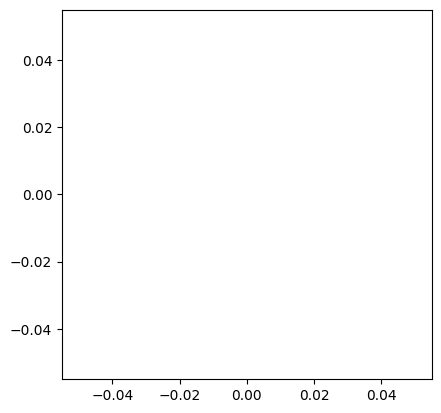

In [42]:
fig,ax=plt.subplots()
ax.plot(x[pred_2D_class3],y[pred_2D_class3],color='darkmagenta',linewidth=0.1)
ax.plot(x[pred_2D_class3].mean(axis=1),y[pred_2D_class3].mean(axis=1),color='darkmagenta',linewidth=1)
ax.set_aspect('equal')

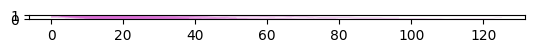

In [43]:
fig,ax=plt.subplots()
ax.plot(x[pred_2D_class4],y[pred_2D_class4],color='orchid',linewidth=0.1)
ax.plot(x[pred_2D_class4].mean(axis=1),y[pred_2D_class4].mean(axis=1),color='orchid',linewidth=1)
ax.set_aspect('equal')

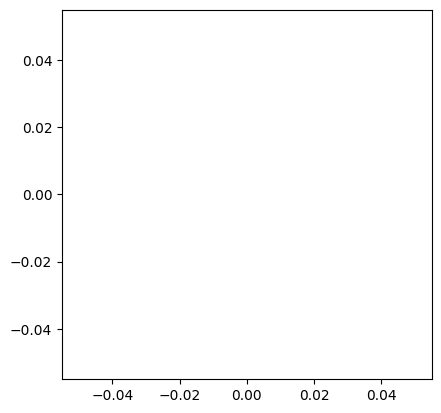

In [44]:
fig,ax=plt.subplots()
ax.plot(x[pred_2D_class5],y[pred_2D_class5],color='darkcyan',linewidth=0.1)
ax.plot(x[pred_2D_class5].mean(axis=1),y[pred_2D_class5].mean(axis=1),color='darkcyan',linewidth=1)
ax.set_aspect('equal')

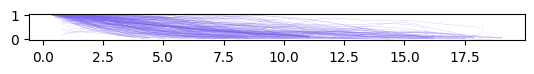

In [45]:
fig,ax=plt.subplots()
ax.plot(x[pred_2D_class6],y[pred_2D_class6],color='mediumslateblue',linewidth=0.1)
ax.plot(x[pred_2D_class6].mean(axis=1),y[pred_2D_class6].mean(axis=1),color='mediumslateblue',linewidth=1)
ax.set_aspect('equal')

In [46]:
x[pred_2D_class1].mean(axis=1)

0       1.207883
1       1.380955
2       1.548872
3       1.711765
4       1.869768
         ...    
294    21.054453
295    21.126164
296    21.196857
297    21.266467
298    21.334929
Length: 299, dtype: float64

In [47]:
dist_prof=np.array(list(range(0,len(y_pred))))*2

In [49]:
# predictions3d=pd.concat([predictions3d,pd.Series(dist_prof,name='distance')],axis=1)

In [51]:
# pred_dist_1=predictions3d['distance'][predictions3d['class']==1]
# pred_dist_2=predictions3d['distance'][predictions3d['class']==2]
# pred_dist_3=predictions3d['distance'][predictions3d['class']==3]
# pred_dist_4=predictions3d['distance'][predictions3d['class']==4]
# pred_dist_5=predictions3d['distance'][predictions3d['class']==5]
# pred_dist_6=predictions3d['distance'][predictions3d['class']==6]

In [ ]:
fig,ax=plt.subplots()
ax.set_aspect('equal')
ax.bar(pred_dist_1, height=25, width=2,color='firebrick')
ax.bar(pred_dist_2, height=25, width=2,color='darkorange')
ax.bar(pred_dist_3, height=25, width=2,color='darkmagenta')
ax.bar(pred_dist_4, height=25, width=2,color='orchid')
ax.bar(pred_dist_5, height=25, width=2,color='darkcyan')
ax.bar(pred_dist_6, height=25, width=2,color='mediumslateblue')

## Save prediction file

In [ ]:
path="../Data2/Classification_results/"
file = scarp_name+'_prediction.txt'
predictions.to_csv(path+file)

In [ ]:
predictions